# Haar Cascade classifier

# Introduction
In this lab we use **OpenCV's Haar Cascade classifiers** to detect **faces, eyes, and smiles** in images.\
These classifiers are **pre-trained XML files** that you can load and run quickly on images.

# Why we do this?\

Haar Cascades are a simple and fast way to detect objects (faces, eyes, smiles).\
They are useful for:\

   - Learning object detection basics
   - Real-time / low-resource applications

# What is a Haar Cascade?
   - Haar cascade detectors follow the **Viola–Jones framework.**
   - They compute **simple rectangular Haar features** on an image.
   - They use **integral images** for speed.
   - A cascade of classifiers quickly decides if a region is a face.
   - The cascade rejects most non-face regions early **→ fast detection.**
       
# Where to get the cascade XML files?
   - OpenCV already provides many cascades (via cv2.data.haarcascades).\
   - Examples:\
      - haarcascade_frontalface_default.xml → Human face\
      - haarcascade_eye.xml → Eyes\
      - haarcascade_smile.xml → Smiles\
   - More cascades can be found in the OpenCV Haarcascades repo.\
       
# Notes on Parameters (detectMultiScale)

- **scaleFactor →** How much the image size is reduced at each scale.\
(e.g. 1.1 = smaller steps, slower but more accurate)\
- **minNeighbors →** How many neighbours each detection needs to keep it.\
    Higher = fewer false positives, but may miss real faces.\
- **minSize →** Minimum object size (e.g. (30,30)).


# Import libraries    

In [1]:
# Step 1: Import libraries
import cv2
import matplotlib.pyplot as plt

# Helper function to display images in notebook
def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR -> RGB
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load Haar Cascade Classifiers

OpenCV comes with many pre-trained XML files.

- Face: haarcascade_frontalface_default.xml
- Eyes: haarcascade_eye.xml
- Smile: haarcascade_smile.xml

In [2]:
# Load Haar Cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Load an Image

We will use cv2.imread(path) to read an image from disk.

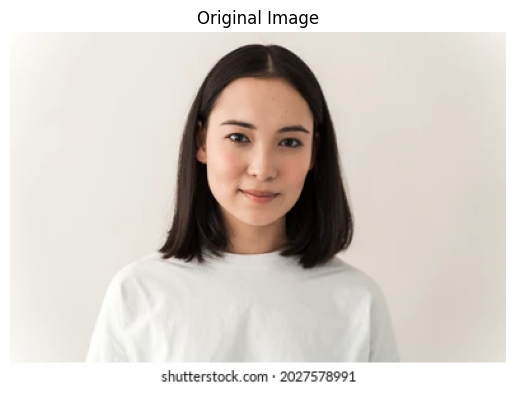

In [3]:
# Load image (update path to your image)
image_path = r"C:\Ds & AI ( my work)\AVSCODE\9. OPENCV\Haar_Cascade_Classifier_Basic_Project\img-1.webp"
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found!")
else:
    show_image(image, "Original Image")

# Face Detection (Simple)

Steps:

  1. Convert to grayscale
  2. Detect faces with detectMultiScale()
  3. Draw rectangles around faces

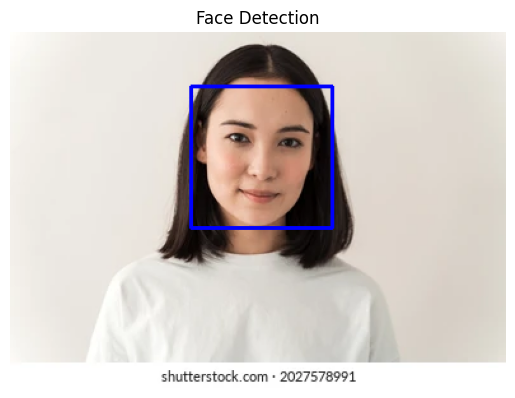

In [4]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

show_image(image, "Face Detection")

# Face + Eyes Detection

We detect eyes **inside the face region.**

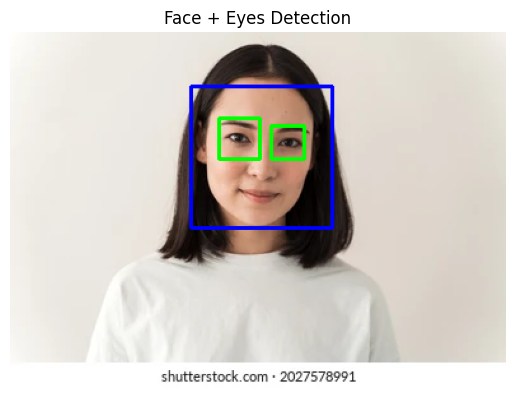

In [5]:
# Reload original image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Region of Interest (ROI) for eyes inside face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

show_image(image, "Face + Eyes Detection")

**Note:** Haar Cascade is not perfect. Sometimes it makes mistakes.\

In our test, it mistakenly predicted the **left part of the smile as an eye.**\
This happens because Haar features are simple and can confuse similar patterns (like dark areas in a smile or eyebrows).\

For more accurate results in real projects, we can:\

- Adjust parameters (scaleFactor, minNeighbors)
- Use better cascades (like haarcascade_eye_tree_eyeglasses.xml)
- Or switch to deep learning-based detectors (more advanced).

**Face + Eyes + Smile Detection**

We split the face into two parts:\

   - Upper half → detect eyes
   - Lower half → detect smiles

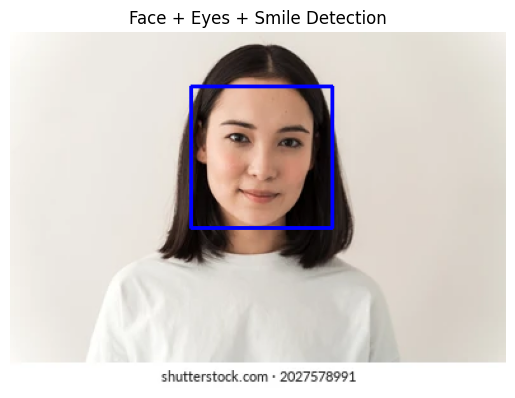

In [6]:
# Reload original image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Eyes in upper half
    roi_gray_eyes = gray[y:y+h//2, x:x+w]
    roi_color_eyes = image[y:y+h//2, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray_eyes, 1.1, 10, minSize=(30,30))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color_eyes, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # Smiles in lower half
    roi_gray_smile = gray[y+h//2:y+h, x:x+w]
    roi_color_smile = image[y+h//2:y+h, x:x+w]
    smiles = smile_cascade.detectMultiScale(roi_gray_smile, 1.7, 20, minSize=(25,25))
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color_smile, (sx, sy), (sx+sw, sy+sh), (255, 0, 255), 2)

show_image(image, "Face + Eyes + Smile Detection")

# Summary

- We learned how to use Haar Cascade Classifiers in OpenCV.\
- These are pre-trained XML files that can detect objects like faces, eyes, and smiles.\
- Steps we followed:\

   1. Imported libraries\
   2. Loaded Haar Cascade XMLs\
   3. Loaded an image\
   4. Detected faces\
   5. Detected faces + eyes\
   6. Detected faces + eyes + smiles\
- We also saw the limitations:\

  - Sometimes false detections (e.g., part of a smile detected as an eye).
  - Works best on human faces, not animals or drawing.
  - Parameters (scaleFactor, minNeighbors) strongly affect results.

- Key takeaway: Haar Cascade is a **fast, beginner-friendly method** for object detection.
It’s great for learning, but for higher accuracy we can move to **deep learning-based detectors** (like DNN, YOLO, SSD).